In [71]:
using GLMNet
using Gadfly

In [46]:
f = open("/scratch2/slund1/joint_pileup_1720/joint_pileup_1720.Float32/matrix")
N = read(f, Int64)
P = read(f, Int64)
subsetSize = 800000
data = zeros(Float32, subsetSize, 350)
column = zeros(Float32, N)
for i in 1:350#P
    read!(f, column)
    data[:,i] = column[1:subsetSize]
end
close(f)

In [94]:
f = open(`ls`)

(Pipe(active, 0 bytes waiting),Process(`ls`, ProcessRunning))

In [74]:
size(data)

(800000,350)

In [76]:
midPoint = 1000#int(subsetSize/2)
lambdas = logspace(-3, 4, 1)
path = glmnet(data[1:midPoint,1:261], data[1:midPoint,350], GLMNet.Poisson(), lambda=lambdas, alpha=1.0);

LoadError: interrupt
while loading In[76], in expression starting on line 3

In [66]:
rmseConstant,rmseValues = eval_rmse(path, data[midPoint+1:end,1:261], data[midPoint+1:end,350])

(385.27148f0,[333.79,333.661,333.658,333.656,333.655,333.654,333.653,333.653,333.653,333.654  …  385.389,385.389,385.389,385.389,385.389,385.389,385.389,385.389,385.389,385.389])

In [69]:
minimum(rmseValues)

333.3264602649508

In [61]:
function eval_rmse(path, X, y)
    prediction = predict(path, X)
    rmseValues = Float64[]
    for i in 1:size(prediction)[2]
        push!(rmseValues, sqrt(mean((y .- prediction[1:end,i]).^2)))
    end
    
    sqrt(mean((y .- mean(y)).^2)),rmseValues
end

eval_rmse (generic function with 1 method)

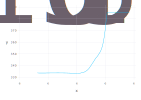

In [68]:
plot(x=path.lambda, y=rmseValues, Geom.line, Scale.x_log)

In [52]:
path.lambda

100-element Array{Float64,1}:
 189040.0   
 172246.0   
 156944.0   
 143002.0   
 130298.0   
 118723.0   
 108176.0   
  98565.5   
  89809.2   
  81830.8   
  74561.2   
  67937.4   
  61902.0   
      ⋮     
     52.6015
     47.9285
     43.6706
     39.7911
     36.2561
     33.0352
     30.1005
     27.4264
     24.99  
     22.7699
     20.7471
     18.904 

In [58]:
logspace(-3, 4, 100)

100-element Array{Float64,1}:
     0.001     
     0.00117681
     0.00138489
     0.00162975
     0.00191791
     0.00225702
     0.00265609
     0.00312572
     0.00367838
     0.00432876
     0.00509414
     0.00599484
     0.0070548 
     ⋮         
  1668.1       
  1963.04      
  2310.13      
  2718.59      
  3199.27      
  3764.94      
  4430.62      
  5214.01      
  6135.91      
  7220.81      
  8497.53      
 10000.0       

In [64]:
path.lambda[66]

39.44206059437656

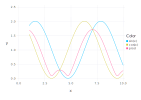

In [92]:
xs = linspace(1,10, 1000)
plot(
    x=[xs, xs, xs],
    y=[sin(xs)+1.01, cos(xs)+1.01, (sin(xs)+1.01).^(1/2).*(cos(xs)+1.01).^(1/2)],
color=[["sin(x)" for x in xs], ["cos(x)" for x in xs], ["prod" for x in xs]], #Scale.y_log,
    Geom.line
)